<div class="alert alert-block alert-info">
<b><h1>Randomized Optimization</h1></div>
</a><a class="anchor" id="exploration"></a>

In [ ]:
#pip install mlrose-hiive
#pip install mlrose

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose as mlrose
import math, time
from mlrose import DiscreteOpt
from mlrose import  ExpDecay
from datetime import datetime
import mlrose_hiive
from mlrose_hiive import random_hill_climb, SARunner, ExpDecay, GARunner, MIMICRunner
import time
import random
import itertools
import math

np.random.seed(100)

<div class="alert alert-block alert-warning">
<b>Four Peaks</b>
</div> </a><a class="anchor" id="encoding"></a>

In [21]:
def fill_array(max_iters, curve):
    max_value = max(curve)
    
    empty_array = np.empty(max_iters)
    empty_array[:] = max_value
    
    len_curve = len(curve)
    
    if len_curve >= max_iters:
        empty_array[0:max_iters] = curve[0:max_iters]
    else:
        empty_array[0:len_curve] = curve[0:len_curve]
    
    return empty_array, len_curve

In [33]:
fitness = mlrose.FourPeaks() #with default t_pct = 0.1
# define a optimization problem object
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness,
                             maximize = True, max_val = 2)

max_attempts = 100
max_iters = 1000

# run randomized hill climbing
start_time = time.time()
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts = 10, curve = True,
                                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                                   random_state = 100)
end_time = time.time()
rhc_time = end_time - start_time
print('The best state found for RHC is: ', best_state)
print('The fitness at the best state for RHC is: ', best_fitness)
print('run time for RHC is: ', rhc_time)

# run simulated annealing
start_time = time.time()
best_state_SA, best_fitness_SA, fitness_curve_SA = mlrose.simulated_annealing(problem, curve = True,
                                                                              max_attempts = max_attempts, 
                                                                              max_iters = max_iters,
                                                                              random_state = 100,
                                                                              schedule=mlrose.GeomDecay(init_temp = 100, decay=0.8, min_temp=1)
                                                                             )
end_time = time.time()
sa_time = end_time - start_time
print('The best state found for SA is: ', best_state_SA)
print('The fitness at the best state for SA is: ', best_fitness_SA)
print('run time for SA is: ', sa_time)

# run generic algorithm
start_time = time.time()
best_state_GA, best_fitness_GA, fitness_curve_GA = mlrose.genetic_alg(problem, curve = True,
                                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                                      random_state = 100, pop_size=200,
                                                                      mutation_prob=0.01
                                                                     )
end_time = time.time()
ga_time = end_time - start_time
print('The best state found for GA is: ', best_state_GA)
print('The fitness at the best state for GA is: ', best_fitness_GA)
print('run time for GA is: ', ga_time)


# run MIMIC
start_time = time.time()
best_state_MM, best_fitness_MM, fitness_curve_MM = mlrose.mimic(problem, curve = True,
                                                                max_attempts = 10, max_iters = 25,
                                                                random_state = 100
                                                                )
end_time = time.time()
mimic_time = end_time - start_time
print('The best state found for MIMIC is: ', best_state_MM)
print('The fitness at the best state for MIMIC is: ', best_fitness_MM)
print('run time for MIMIC is: ', mimic_time)

The best state found for RHC is:  [1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The fitness at the best state for RHC is:  20.0
run time for RHC is:  0.028374433517456055
The best state found for SA is:  [1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
The fitness at the best state for SA is:  8.0
run time for SA is:  0.028223514556884766
The best state found for GA is:  [1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0
 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The fitness at the best state for GA is:  128.0
run time for GA is:  3.7698516845703125
The best state found 

In [34]:
max_iters = 1000
fitness_RHC, len_RHC = fill_array(max_iters, fitness_curve)
fitness_SA, len_SA = fill_array(max_iters, fitness_curve_SA)
fitness_GA, len_GA = fill_array(max_iters, fitness_curve_GA)
fitness_MM, len_MM = fill_array(max_iters, fitness_curve_MM) 

  Algorithm  Time (s)
0       RHC   0.02837
1        SA   0.02822
2        GA   3.76985
3     MIMIC  51.22713


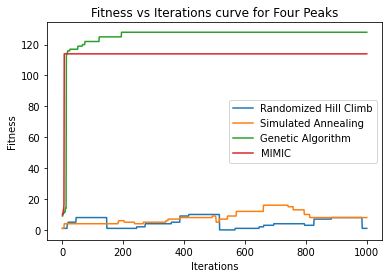

In [35]:
 # Plot Iterations vs Fitness
iterations = range(1, 1001)
plt.figure()

plt.plot(iterations, fitness_RHC, label='Randomized Hill Climb')
plt.plot(iterations, fitness_SA, label='Simulated Annealing')
plt.plot(iterations, fitness_GA, label='Genetic Algorithm')
plt.plot(iterations, fitness_MM, label='MIMIC')

plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title('Fitness vs Iterations curve for Four Peaks')

data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 

df = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
print(df)

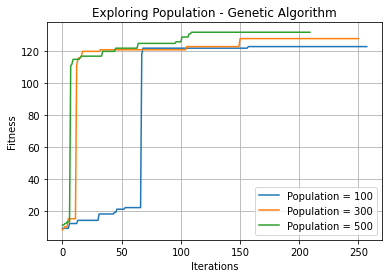

[123.0, 128.0, 132.0]


In [29]:
# Evaluating different population values

pop_size = [100, 300, 500]
mutation_prob = [0.01]
fitnesses = [] 
scores = []

for i in range (len(param1)): 
  for j in range (len(param2)):
    _, ga_fit, ga_fit_curve= mlrose.genetic_alg(problem, 
                                                mutation_prob = mutation_prob[j], 
                                                pop_size = pop_size[i],
                                                max_attempts = 100, 
                                                max_iters = max_iters,  
                                                curve=True)
    fitnesses.append(ga_fit_curve)
    scores.append(ga_fit)

n = 0 
for i in range (len(pop_size)): 
    plt.plot(fitnesses[n], label='Population = ' + str(pop_size[i]) )
    n+=1 
  
plt.title('Exploring Population - Genetic Algorithm')
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend(loc = "best")
plt.grid()
plt.show()

print(scores)

<div class="alert alert-block alert-warning">
<b>max K-color</b>
</div> </a><a class="anchor" id="encoding"></a>

In [85]:
elements = list(range(0, 100))
all_edges = list(itertools.combinations(elements, 2)) ## all edges between 0-99, 4950 edges
edges = random.sample(all_edges, 3000)


fitness = mlrose.MaxKColor(edges) 

# define a optimization problem object
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness,
                             maximize = True, max_val = 2)

max_attempts = 100
max_iters = 1000

# # run randomized hill climbing
start_time = time.time()
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts = 100, curve = True,
                                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                                   random_state = 100)
end_time = time.time()
rhc_time = end_time - start_time
print('The best state found for RHC is: ', best_state)
print('The fitness at the best state for RHC is: ', best_fitness)
print('run time for RHC is: ', rhc_time)

# run simulated annealing
start_time = time.time()
best_state_SA, best_fitness_SA, fitness_curve_SA = mlrose.simulated_annealing(problem, curve = True,
                                                                              max_attempts = max_attempts, 
                                                                              max_iters = max_iters,
                                                                              random_state = 100,
                                                                              schedule=mlrose.GeomDecay(init_temp = 1, 
                                                                                            decay=0.99, min_temp=0.001)
                                                                             )
end_time = time.time()
sa_time = end_time - start_time
print('The best state found for SA is: ', best_state_SA)
print('The fitness at the best state for SA is: ', best_fitness_SA)
print('run time for SA is: ', sa_time)

# run generic algorithm
start_time = time.time()
best_state_GA, best_fitness_GA, fitness_curve_GA = mlrose.genetic_alg(problem, curve = True,
                                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                                      random_state = 100, 
                                                                      pop_size=200,
                                                                      mutation_prob=0.01
                                                                     )
end_time = time.time()
ga_time = end_time - start_time
print('The best state found for GA is: ', best_state_GA)
print('The fitness at the best state for GA is: ', best_fitness_GA)
print('run time for GA is: ', ga_time)


# run MIMIC
start_time = time.time()
best_state_MM, best_fitness_MM, fitness_curve_MM = mlrose.mimic(problem, curve = True,
                                                                max_attempts = 10, max_iters = 25,
                                                                random_state = 100
                                                                )
end_time = time.time()
mimic_time = end_time - start_time
print('The best state found for MIMIC is: ', best_state_MM)
print('The fitness at the best state for MIMIC is: ', best_fitness_MM)
print('run time for MIMIC is: ', mimic_time)

The best state found for RHC is:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The fitness at the best state for RHC is:  3000.0
run time for RHC is:  57.17565107345581
The best state found for SA is:  [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
The fitness at the best state for SA is:  2823.0
run time for SA is:  0.6091766357421875
The best state found for GA is:  [0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1]
The fitness at the best state for GA is:  1841.0
run time for GA is:  28.278281211853027
The best state found

In [86]:
## fill fitness curve after reach the max value with the max value
max_iters = 1000
fitness_RHC, len_RHC = fill_array(max_iters, fitness_curve)
fitness_SA, len_SA = fill_array(max_iters, fitness_curve_SA)
fitness_GA, len_GA = fill_array(max_iters, fitness_curve_GA)
fitness_MM, len_MM = fill_array(max_iters, fitness_curve_MM)

  Algorithm  Time (s)
0       RHC  57.17565
1        SA   0.60918
2        GA  28.27828
3     MIMIC  65.54122


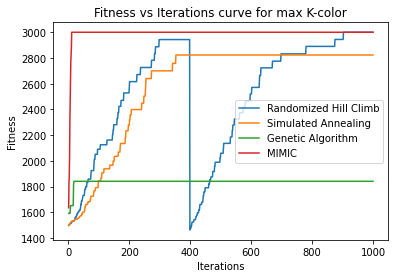

In [87]:
 # Plot Iterations vs Fitness
iterations = range(1, 1001)
plt.figure()

plt.plot(iterations, fitness_RHC, label='Randomized Hill Climb')
plt.plot(iterations, fitness_SA, label='Simulated Annealing')
plt.plot(iterations, fitness_GA, label='Genetic Algorithm')
plt.plot(iterations, fitness_MM, label='MIMIC')

plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title('Fitness vs Iterations curve for max K-color')

data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 

df = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
print(df)

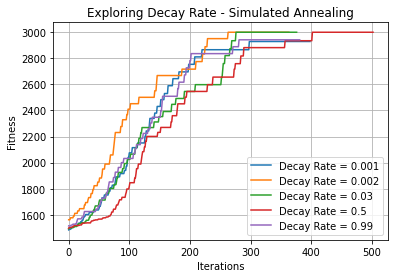

[2929.0, 3000.0, 3000.0, 3000.0, 2942.0]


In [88]:
decay = [0.001, 0.002, 0.03, 0.5, 0.99]
fitnesses = [] 
scores = []

for i in range (len(decay)): 
  sch = mlrose_hiive.GeomDecay(init_temp = 1.0, decay = decay[i])
  _, sa_fit, sa_fit_curve = mlrose.simulated_annealing(problem, 
                                                       schedule = sch,
                                                       max_attempts = 100, 
                                                       max_iters = max_iters, 
                                                       curve = True)
  fitnesses.append(sa_fit_curve)
  scores.append(sa_fit)

for i in range (len(decay)):
  plt.plot(fitnesses[i] ,label='Decay Rate = ' + str(decay[i]))
  
plt.title('Exploring Decay Rate - Simulated Annealing')
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend(loc = "best")
plt.grid()
plt.show()

print(scores)

<div class="alert alert-block alert-warning">
<b>Travelling Salesperson Problem</b>
</div> </a><a class="anchor" id="encoding"></a>

In [64]:
coords_list = [(1, 2), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]
problem= mlrose.TSPOpt(length = 8, coords = coords_list, maximize=False)



max_attempts = 100
max_iters = 1000

# # run randomized hill climbing
start_time = time.time()
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts = 100, curve = True,
                                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                                   random_state = 100)
end_time = time.time()
rhc_time = end_time - start_time
print('The best state found for RHC is: ', best_state)
print('The fitness at the best state for RHC is: ', best_fitness)
print('run time for RHC is: ', rhc_time)

# run simulated annealing
start_time = time.time()
best_state_SA, best_fitness_SA, fitness_curve_SA = mlrose.simulated_annealing(problem, curve = True,
                                                                              max_attempts = max_attempts, 
                                                                              max_iters = max_iters,
                                                                              random_state = 100,
                                                                              schedule=mlrose.GeomDecay(init_temp = 1, 
                                                                                            decay=0.99, min_temp=0.001)
                                                                             )
end_time = time.time()
sa_time = end_time - start_time
print('The best state found for SA is: ', best_state_SA)
print('The fitness at the best state for SA is: ', best_fitness_SA)
print('run time for SA is: ', sa_time)

# run generic algorithm
start_time = time.time()
best_state_GA, best_fitness_GA, fitness_curve_GA = mlrose.genetic_alg(problem, curve = True,
                                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                                      random_state = 100, 
                                                                      pop_size=200,
                                                                      mutation_prob=0.01
                                                                     )
end_time = time.time()
ga_time = end_time - start_time
print('The best state found for GA is: ', best_state_GA)
print('The fitness at the best state for GA is: ', best_fitness_GA)
print('run time for GA is: ', ga_time)


# run MIMIC
start_time = time.time()
best_state_MM, best_fitness_MM, fitness_curve_MM = mlrose.mimic(problem, curve = True,
                                                                max_attempts = 10, max_iters = 25,
                                                                random_state = 100
                                                                )
end_time = time.time()
mimic_time = end_time - start_time
print('The best state found for MIMIC is: ', best_state_MM)
print('The fitness at the best state for MIMIC is: ', best_fitness_MM)
print('run time for MIMIC is: ', mimic_time)

The best state found for RHC is:  [7 6 5 4 3 2 1 0]
The fitness at the best state for RHC is:  16.358485472372255
run time for RHC is:  1.4875617027282715
The best state found for SA is:  [0 7 1 2 3 4 5 6]
The fitness at the best state for SA is:  16.358485472372255
run time for SA is:  0.08177709579467773
The best state found for GA is:  [5 6 7 0 1 2 3 4]
The fitness at the best state for GA is:  16.358485472372255
run time for GA is:  3.017387628555298
The best state found for MIMIC is:  [5 3 2 1 4 7 0 6]
The fitness at the best state for MIMIC is:  17.727968770336453
run time for MIMIC is:  1.0328354835510254


In [65]:
## fill fitness curve after reach the max value with the max value
max_iters = 1000
fitness_RHC, len_RHC = fill_array(max_iters, fitness_curve)
fitness_SA, len_SA = fill_array(max_iters, fitness_curve_SA)
fitness_GA, len_GA = fill_array(max_iters, fitness_curve_GA)
fitness_MM, len_MM = fill_array(max_iters, fitness_curve_MM)

  Algorithm  Time (s)
0       RHC   1.48756
1        SA   0.08178
2        GA   3.01739
3     MIMIC   1.03284


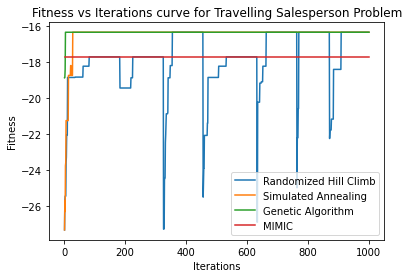

In [66]:
 # Plot Iterations vs Fitness
iterations = range(1, 1001)
plt.figure()

plt.plot(iterations, fitness_RHC, label='Randomized Hill Climb')
plt.plot(iterations, fitness_SA, label='Simulated Annealing')
plt.plot(iterations, fitness_GA, label='Genetic Algorithm')
plt.plot(iterations, fitness_MM, label='MIMIC')

plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title('Fitness vs Iterations curve for Travelling Salesperson Problem')

data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 

df = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
print(df)

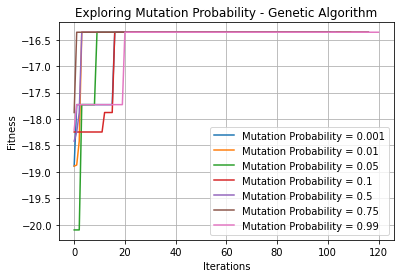

[16.358485472372255, 16.358485472372255, 16.358485472372255, 16.358485472372255, 16.358485472372255, 16.358485472372255, 16.358485472372255]


In [82]:
# Evaluating different Mutation Probability values

pop_size = [200]
mutation_prob = [0.001,0.01,0.05,0.1,0.5,0.75, 0.99]
fitnesses = [] 
scores = []

for i in range (len(mutation_prob)): 
  for j in range (len(pop_size)):
    _, ga_fit, ga_fit_curve= mlrose.genetic_alg(problem, 
                                                mutation_prob = mutation_prob[i], 
                                                pop_size = pop_size[j],
                                                random_state = 100,
                                                max_attempts = 100, 
                                                max_iters = max_iters,  
                                                curve=True)
    fitnesses.append(ga_fit_curve)
    scores.append(ga_fit)

n = 0 
for i in range (len(mutation_prob)): 
    plt.plot(fitnesses[n], label='Mutation Probability = ' + str(mutation_prob[i]) )
    n+=1 
  
plt.title('Exploring Mutation Probability - Genetic Algorithm')
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend(loc = "best")
plt.grid()
plt.show()

print(scores)